# Análisis de los Datos del Corán

Este notebook contiene un análisis exploratorio de los datos del proyecto, incluyendo estadísticas descriptivas y visualizaciones para el Corán en árabe e inglés necesarias para la primera entrega del proyecto.

Libererías necesarias.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import wordpunct_tokenize
from camel_tools.morphology.analyzer import Analyzer
from camel_tools.morphology.analyzer import DEFAULT_NORMALIZE_MAP
from camel_tools.morphology.database import MorphologyDB

Empecemos:

In [2]:
ar_q = pd.read_csv("../data/raw_data/arab_quran.txt", 
                    sep="|", 
                    names=["Capítulo", "Versículo", "Texto"],
                    engine="python",
                    header=None)
ar_q["Capítulo"] = pd.to_numeric(ar_q["Capítulo"], errors="coerce")
ar_q.head()

,Capítulo,Versículo,Texto
0,1.0,1.0,بسم الله الرحمن الرحيم
1,1.0,2.0,الحمد لله رب العالمين
2,1.0,3.0,الرحمن الرحيم
3,1.0,4.0,مالك يوم الدين
4,1.0,5.0,إياك نعبد وإياك نستعين


Estadísticas básicas

In [3]:
# Simplemente para ver el número de versos sin tener que eliminar los derechos de autor del dataset original
n_versos = len(ar_q["Texto"])
print(f"Número de versos antes de limpiar: {n_versos}")


ar_q = ar_q.dropna(subset=['Texto'])
ar_q = ar_q[ar_q['Texto'].str.strip() != '']

n_versos = len(ar_q["Texto"])
print(f"Número de versos después de limpiar: {n_versos}")

Número de versos antes de limpiar: 6264
Número de versos después de limpiar: 6236


In [4]:
n_capitulos = ar_q["Capítulo"].nunique()

print(f"Número de versos del Corán: {n_versos}.")
print(f"Número de capítulos del Corán: {n_capitulos}.")

ar_q["Número de palabras del verso"] = ar_q["Texto"].str.split().apply(lambda x: len(x) if isinstance(x, list) else 0)

n_palabras = ar_q["Número de palabras del verso"].sum()
promedio_palabras = ar_q["Número de palabras del verso"].mean()

print(f"Número total de palabras: {n_palabras}.")
print(f"Número promedio de palabras por verso: {round(promedio_palabras, 0)}.")

Número de versos del Corán: 6236.
Número de capítulos del Corán: 114.
Número total de palabras: 82627.
Número promedio de palabras por verso: 13.0.


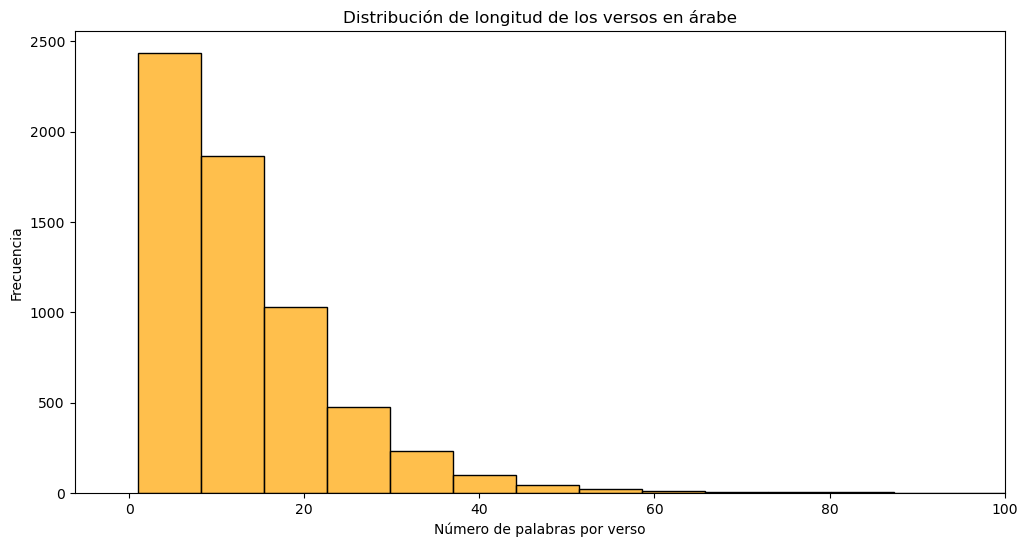

In [5]:
plt.figure(figsize=(12,6))
sns.histplot(ar_q["Número de palabras del verso"], bins=20, color="orange", alpha=.7)
plt.xlim(right=100)
plt.xlabel("Número de palabras por verso")
plt.ylabel("Frecuencia")
plt.title("Distribución de longitud de los versos en árabe")
plt.show()

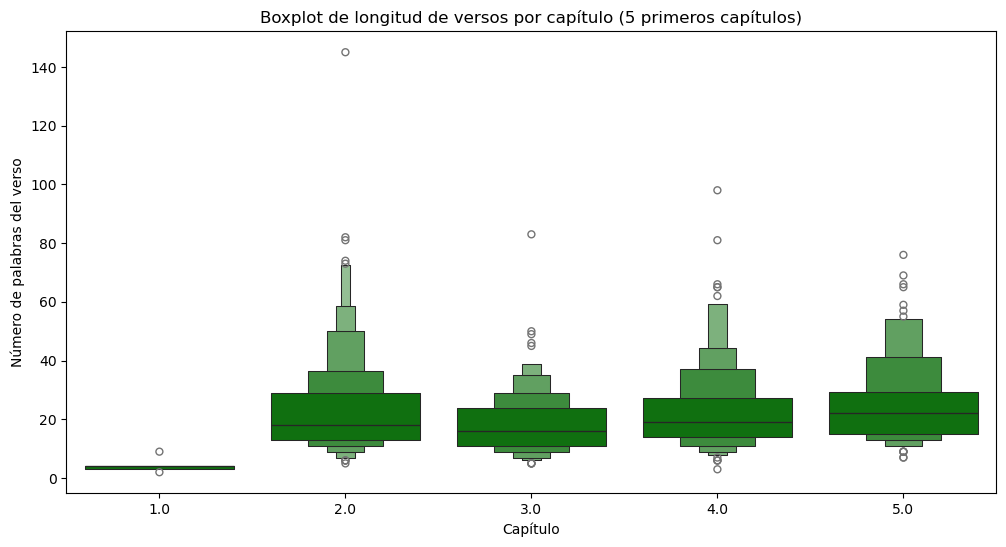

In [6]:
plt.figure(figsize=(12,6))
sns.boxenplot(x="Capítulo", y="Número de palabras del verso", data=ar_q[ar_q["Capítulo"] <= 5], color="green")
plt.title("Boxplot de longitud de versos por capítulo (5 primeros capítulos)")
plt.show()

Vamos a jugar un poco con nltk a ver que nos ofrece

In [9]:
db = MorphologyDB.builtin_db()
tokens = nltk.wordpunct_tokenize(ar_q["Texto"].str.cat(sep=" "))
categorias = Analyzer(db, norm_map=DEFAULT_NORMALIZE_MAP).analyze_words(tokens)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\diego\\AppData\\Roaming\\camel_tools\\data\\morphology_db\\calima-msa-r13\\morphology.db'

Para obtener la traducción instantánea de las 20 palabras más frecuentes, trabajaremos directamente con el Corán en inglés.

[nltk_data] Downloading package stopwords to /home/unai-olaizola-
[nltk_data]     osa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


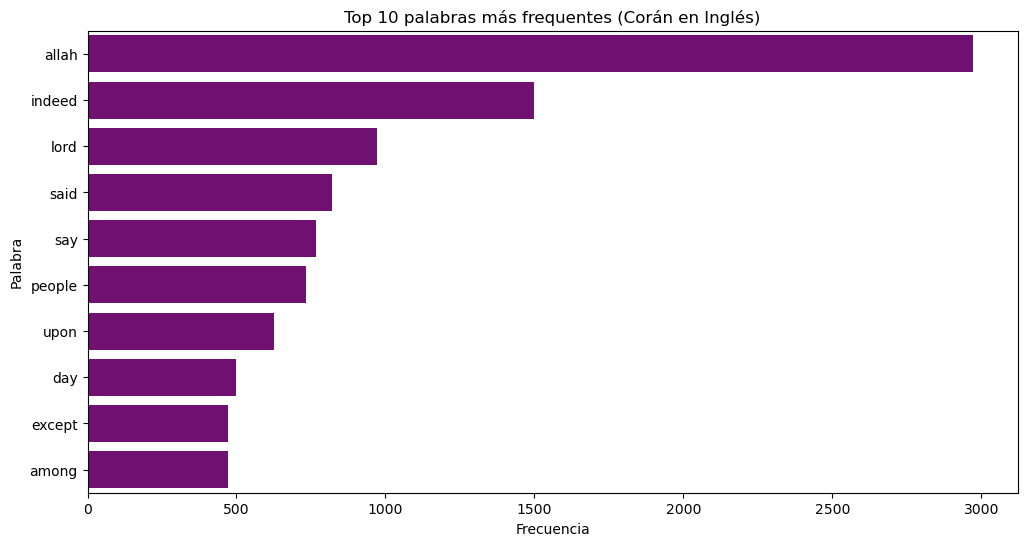

In [54]:
eng_q = pd.read_csv('/home/unai-olaizola-osa/Documents/NLP-Group-Project/NLP-Group-Project/data/raw_data/english_quran.txt', 
                    sep="|", 
                    names=["Capítulo", "Verso", "Texto"],
                    engine="python",
                    quoting=3, # Necesario para evitar problemas con las comillas en el texto en inglés.
                    header=None)
eng_q["Capítulo"] = pd.to_numeric(eng_q["Capítulo"], errors="coerce")
eng_q.head()

palabras = " ".join(eng_q["Texto"].dropna()).split()

# Para una representación más filedigna, vamos a obviar los stopwords
nltk.download("stopwords")
stopwords_eng = set(stopwords.words("english"))

palabras_sin_sw = [
    p.lower().strip(string.punctuation)  # quita comas, puntos, ... 
    for p in eng_q["Texto"].dropna().str.split().sum()
    if p.lower().strip(string.punctuation) not in stopwords_eng and p.lower().strip(string.punctuation) != ""
]
frequencia_palabra = Counter(palabras_sin_sw)

top10 = frequencia_palabra.most_common(10)

palabras, frequencias = zip(*top10)

plt.figure(figsize=(12,6))
sns.barplot(x=list(frequencias), y=list(palabras), color="purple")
plt.title("Top 10 palabras más frequentes (Corán en Inglés)")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.show()